In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, roc_curve, auc
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve

In [ ]:
data = load_breast_cancer()

x = data.data[:, :2]
y = data.target

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3 , random_state = 42)

# 1. 使用KNN分類breast_cancer datasets

In [ ]:
def plot_contourf(clf):
  h = .02
  x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
  y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

  cmap_light = ListedColormap(['red', 'green'])
  cmap_bold = ['orange', 'lightgreen']

  Z = Z.reshape(xx.shape)
  plt.figure(figsize=(8, 6))
  plt.contourf(xx, yy, Z, cmap=cmap_light)
  sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=data.target_names[y],
                      palette=cmap_bold, alpha=1.0)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.title("Classification Example")
  plt.show()

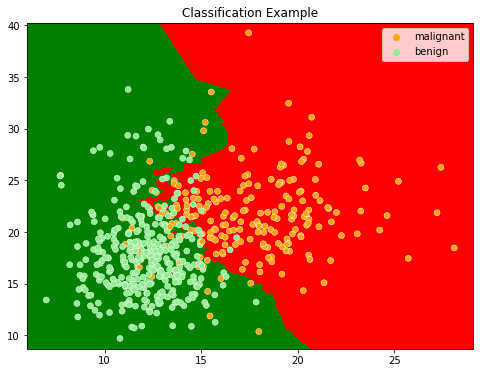

In [ ]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(train_x,train_y)

plot_contourf(clf)

# 2. 將各評分數值畫出來

In [ ]:
def print_score(x,y, clf):
  pred = clf.predict(x)
  print("Test Accuracy: ", clf.score(x,y))
  print("Precision: ", precision_score(y,pred))
  print("Recall: ", recall_score(y,pred))
  print("F1: ", f1_score(y,pred))

  disp = plot_confusion_matrix(clf, x, y, display_labels=data.target_names, cmap=plt.cm.Blues, normalize='true')
  disp.ax_.set_title("Normalized confusion matrix")

  disp_2 = plot_precision_recall_curve(clf, x, y)
  disp_2.ax_.set_title("Precison Recall Curve")

  disp_3 = plot_roc_curve(clf, x, y)
  disp_3.ax_.set_title("ROC Curve")
  disp_3.ax_.plot([0,1],[0,1],linestyle='--', color = "red")

  plt.show()

On Trainning Data
Test Accuracy:  0.9095477386934674
Precision:  0.9049429657794676
Recall:  0.9558232931726908
F1:  0.9296875


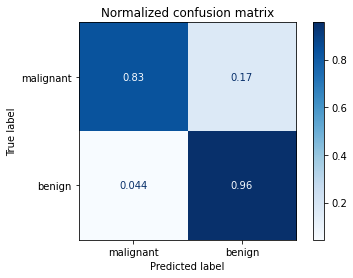

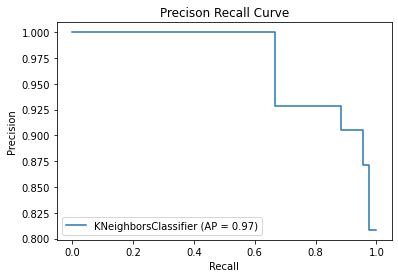

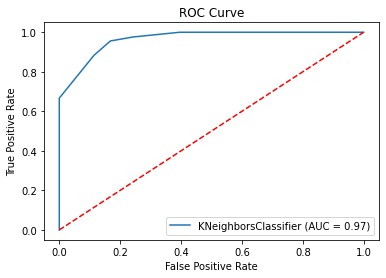


On Test Data
Test Accuracy:  0.8771929824561403
Precision:  0.8782608695652174
Recall:  0.9351851851851852
F1:  0.905829596412556


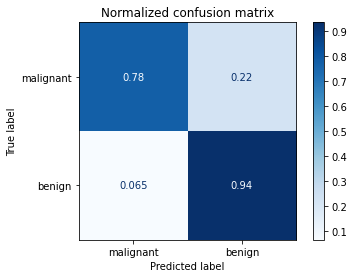

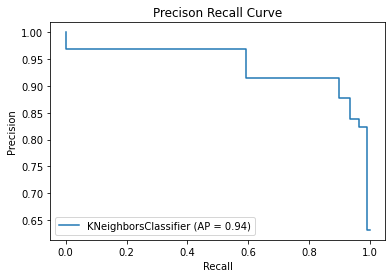

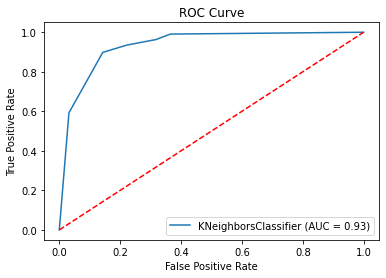

In [ ]:
print("On Trainning Data")
print_score(train_x,train_y, clf)
print("\nOn Test Data")
print_score(test_x,test_y, clf)

# 3. 額外處理

## n = 10

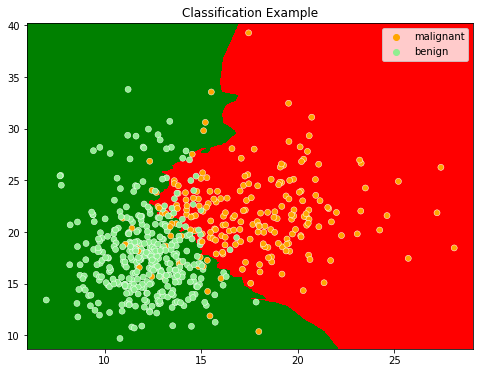

In [ ]:
clf_k_equals_10 = KNeighborsClassifier(n_neighbors=10)
clf_k_equals_10.fit(train_x,train_y)

plot_contourf(clf_k_equals_10)

On Trainning Data
Test Accuracy:  0.8969849246231156
Precision:  0.9
Recall:  0.9397590361445783
F1:  0.9194499017681729


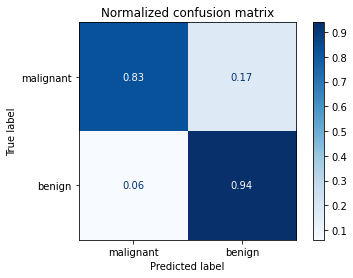

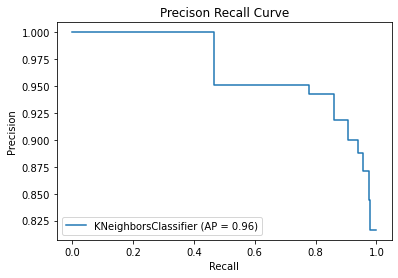

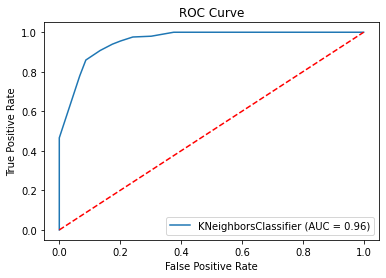


On Test Data
Test Accuracy:  0.8888888888888888
Precision:  0.8938053097345132
Recall:  0.9351851851851852
F1:  0.9140271493212669


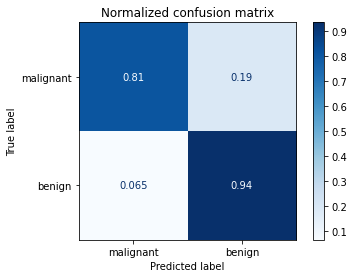

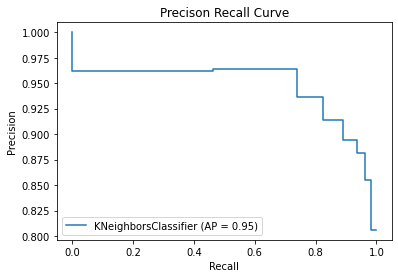

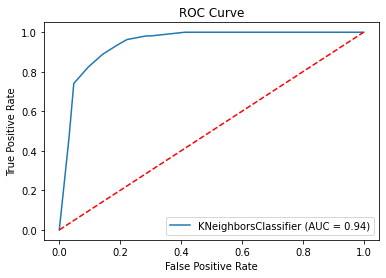

In [ ]:
print("On Trainning Data")
print_score(train_x,train_y, clf_k_equals_10)
print("\nOn Test Data")
print_score(test_x,test_y, clf_k_equals_10)

## n = 20

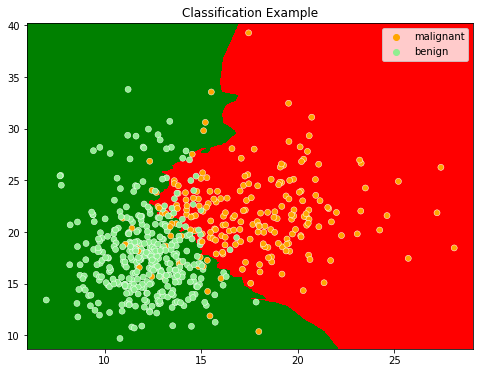

In [ ]:
clf_k_equals_20 = KNeighborsClassifier(n_neighbors=10)
clf_k_equals_20.fit(train_x,train_y)

plot_contourf(clf_k_equals_20)

On Trainning Data
Test Accuracy:  0.8969849246231156
Precision:  0.9
Recall:  0.9397590361445783
F1:  0.9194499017681729


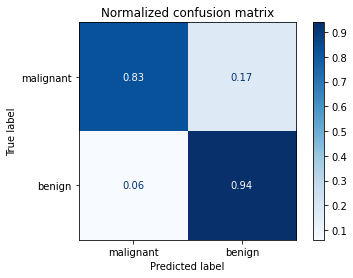

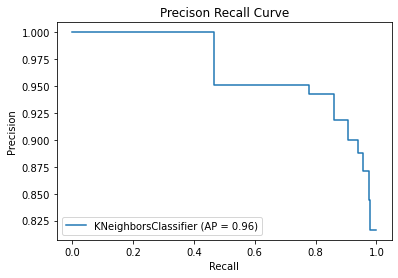

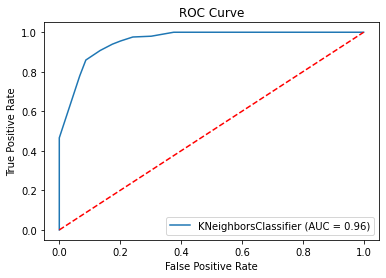


On Test Data
Test Accuracy:  0.8888888888888888
Precision:  0.8938053097345132
Recall:  0.9351851851851852
F1:  0.9140271493212669


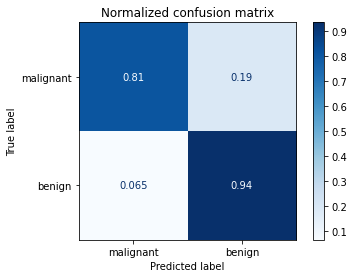

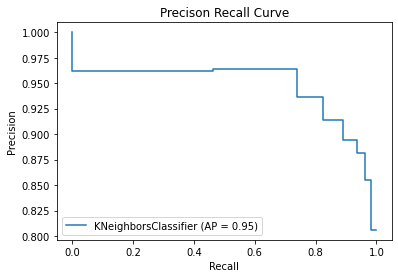

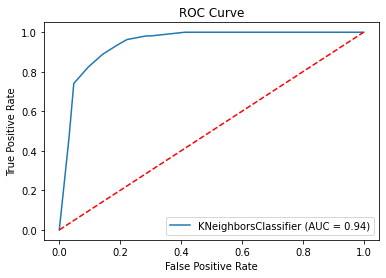

In [ ]:
print("On Trainning Data")
print_score(train_x,train_y, clf_k_equals_20)
print("\nOn Test Data")
print_score(test_x,test_y, clf_k_equals_20)

# 4. 試用其他模型

## Decision Tree Classifier

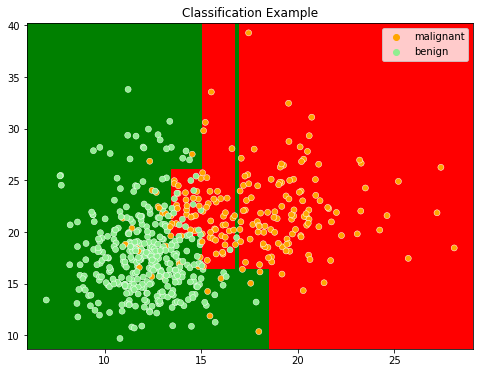

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_depth_4 = DecisionTreeClassifier(max_depth = 4)
tree_depth_4.fit(train_x,train_y)
plot_contourf(tree_depth_4)

On Trainning Data
Test Accuracy:  0.9221105527638191
Precision:  0.92578125
Recall:  0.9518072289156626
F1:  0.9386138613861386


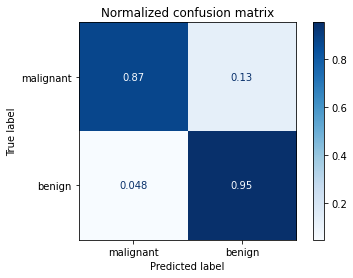

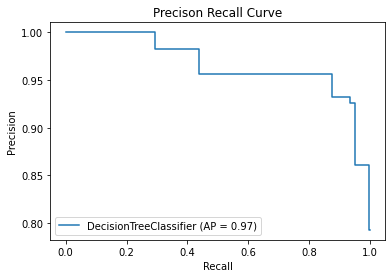

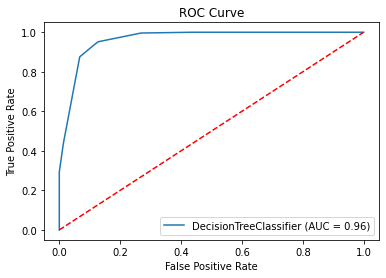


On Test Data
Test Accuracy:  0.9064327485380117
Precision:  0.9107142857142857
Recall:  0.9444444444444444
F1:  0.9272727272727271


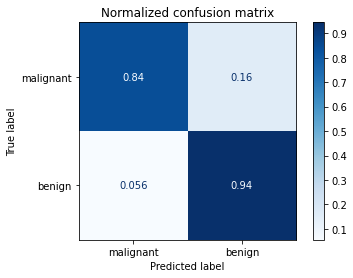

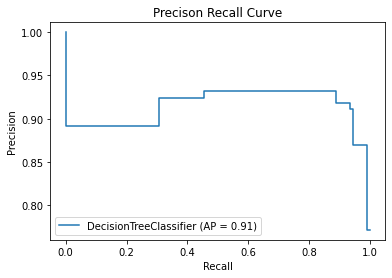

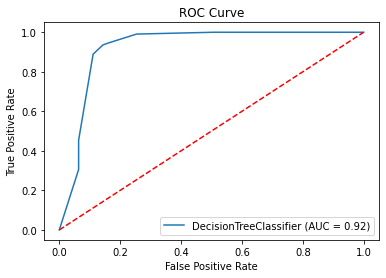

In [ ]:
print("On Trainning Data")
print_score(train_x,train_y, tree_depth_4)
print("\nOn Test Data")
print_score(test_x,test_y, tree_depth_4)

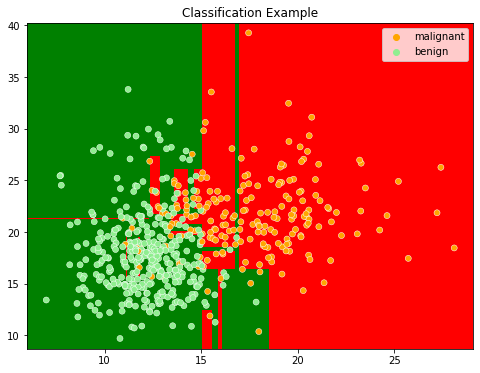

In [ ]:
tree_depth_11 = DecisionTreeClassifier(max_depth = 11)
tree_depth_11.fit(train_x,train_y)
plot_contourf(tree_depth_11)

On Trainning Data
Test Accuracy:  0.9899497487437185
Precision:  0.9919678714859438
Recall:  0.9919678714859438
F1:  0.9919678714859438


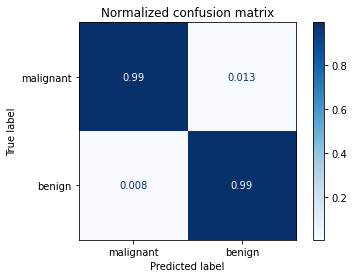

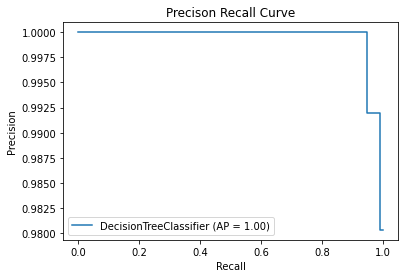

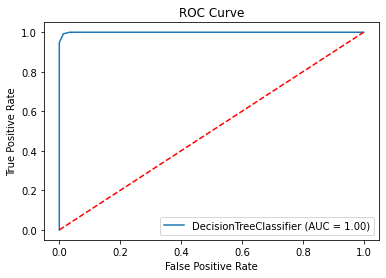


On Test Data
Test Accuracy:  0.8596491228070176
Precision:  0.9038461538461539
Recall:  0.8703703703703703
F1:  0.8867924528301887


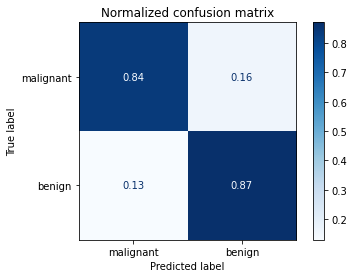

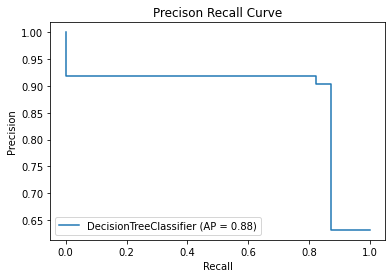

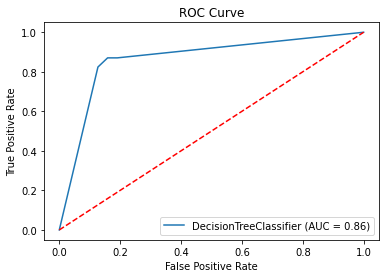

In [ ]:
print("On Trainning Data")
print_score(train_x,train_y, tree_depth_11)
print("\nOn Test Data")
print_score(test_x,test_y, tree_depth_11)

## Logestic Regression

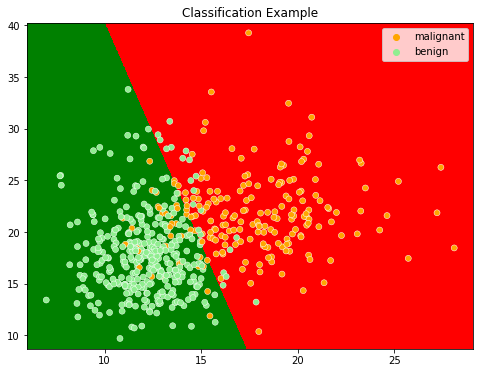

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='none')
clf.fit(train_x,train_y)
plot_contourf(clf)

On Trainning Data
Test Accuracy:  0.8894472361809045
Precision:  0.8957528957528957
Recall:  0.9317269076305221
F1:  0.9133858267716536


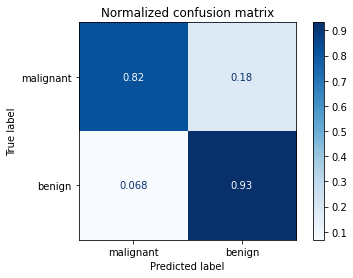

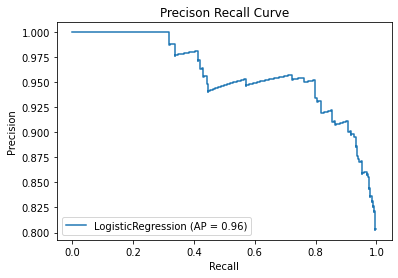

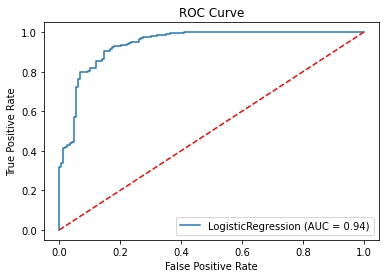


On Test Data
Test Accuracy:  0.9064327485380117
Precision:  0.9035087719298246
Recall:  0.9537037037037037
F1:  0.927927927927928


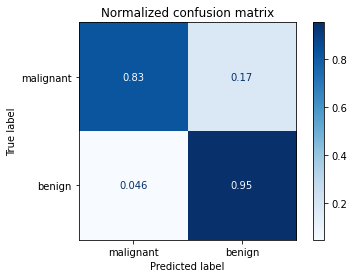

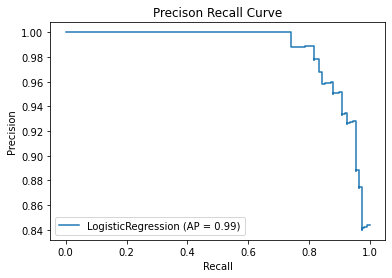

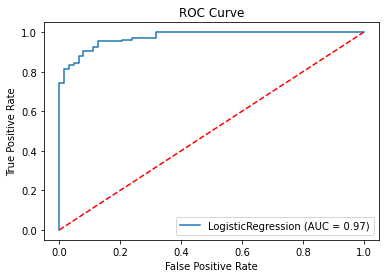

In [ ]:
print("On Trainning Data")
print_score(train_x,train_y, clf)
print("\nOn Test Data")
print_score(test_x,test_y, clf)

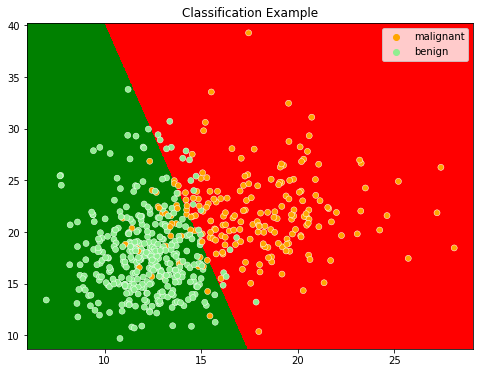

In [ ]:
clf = LogisticRegression(penalty='l2', C=0.5)
clf.fit(train_x,train_y)
plot_contourf(clf)

On Trainning Data
Test Accuracy:  0.8869346733668342
Precision:  0.8923076923076924
Recall:  0.9317269076305221
F1:  0.9115913555992142


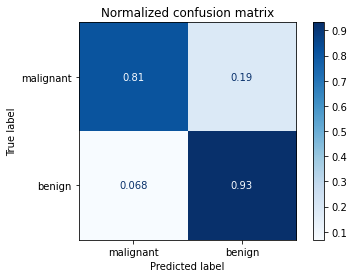

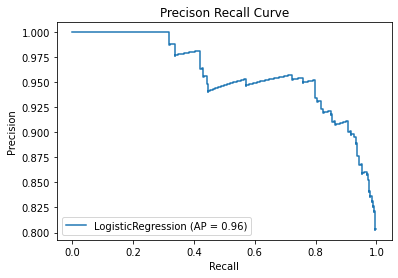

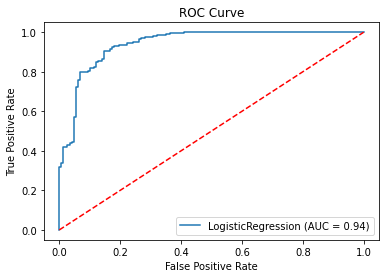


On Test Data
Test Accuracy:  0.9064327485380117
Precision:  0.9035087719298246
Recall:  0.9537037037037037
F1:  0.927927927927928


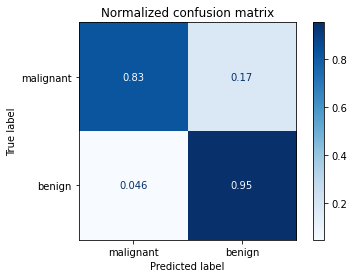

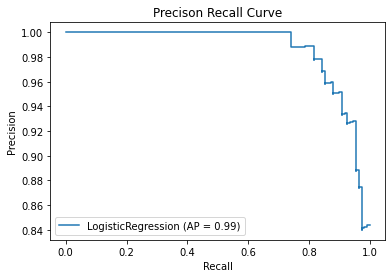

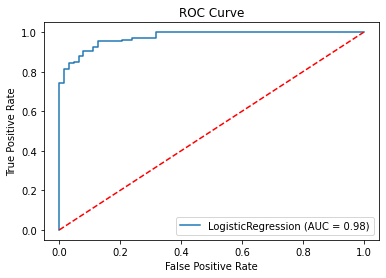

In [ ]:
print("On Trainning Data")
print_score(train_x,train_y, clf)
print("\nOn Test Data")
print_score(test_x,test_y, clf)

## SVC

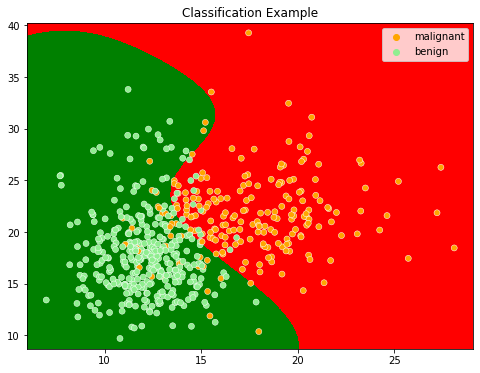

In [ ]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(train_x,train_y)
plot_contourf(clf)

On Trainning Data
Test Accuracy:  0.9095477386934674
Precision:  0.9018867924528302
Recall:  0.9598393574297188
F1:  0.9299610894941635


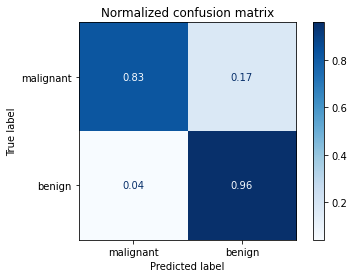

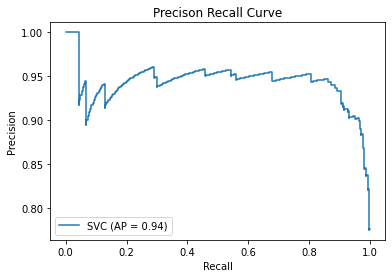

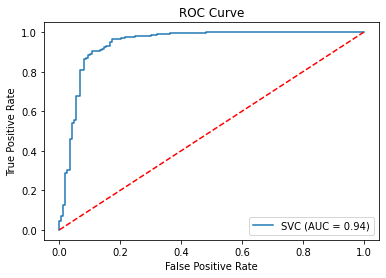


On Test Data
Test Accuracy:  0.9005847953216374
Precision:  0.8956521739130435
Recall:  0.9537037037037037
F1:  0.9237668161434978


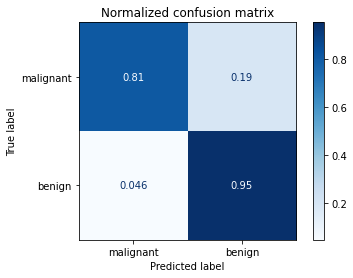

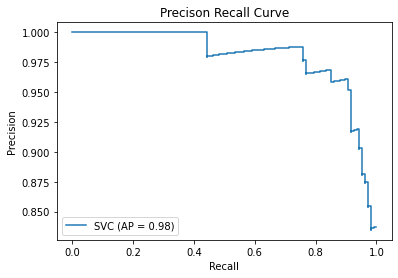

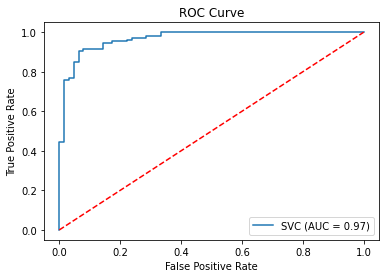

In [ ]:
print("On Trainning Data")
print_score(train_x,train_y, clf)
print("\nOn Test Data")
print_score(test_x,test_y, clf)

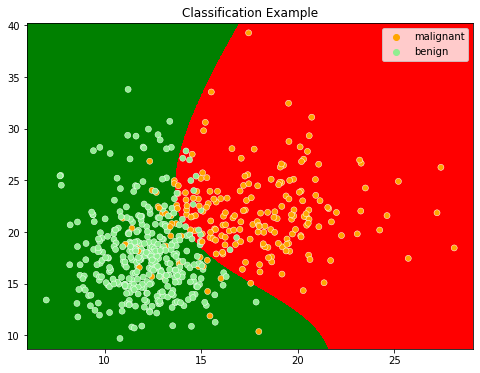

In [ ]:
clf = SVC(kernel = 'poly')
clf.fit(train_x,train_y)
plot_contourf(clf)

On Trainning Data
Test Accuracy:  0.9020100502512562
Precision:  0.8977272727272727
Recall:  0.9518072289156626
F1:  0.9239766081871345


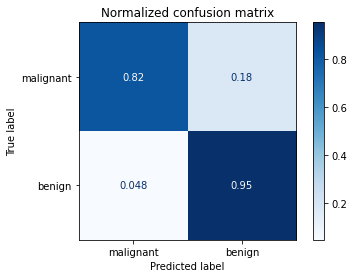

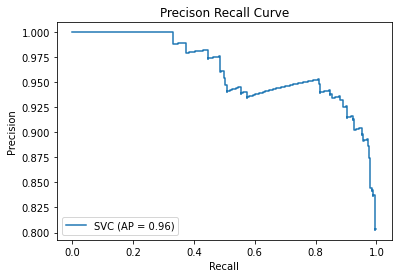

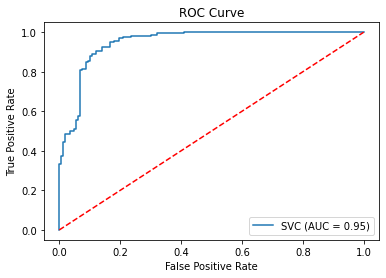


On Test Data
Test Accuracy:  0.9064327485380117
Precision:  0.9181818181818182
Recall:  0.9351851851851852
F1:  0.9266055045871558


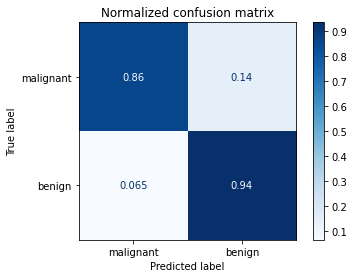

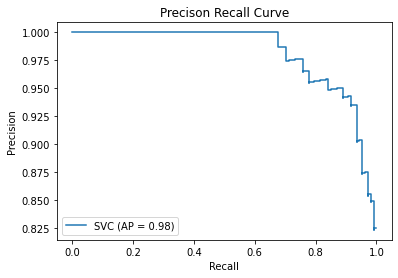

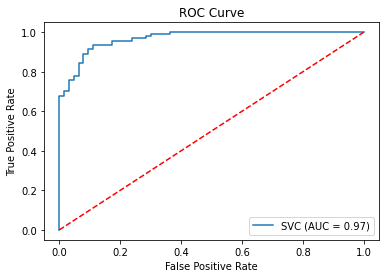

In [ ]:
print("On Trainning Data")
print_score(train_x,train_y, clf)
print("\nOn Test Data")
print_score(test_x,test_y, clf)